In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import StandardScaler
import sklearn as sk
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score# Importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.tree import DecisionTreeRegressor
import sklearn.linear_model as linear_model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
#import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# 1.EDA

In [3]:
train = pd.read_csv('./titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv('./titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
sumbission = pd.read_csv('./titanic/sample_submission.csv')
sumbission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## fill NaN in train data

In [6]:
train['Embarked'] = train['Embarked'].fillna('S')

In [7]:
# 그냥 남/ 여평균으로 대체
train.groupby(['Sex']).mean()['Age']

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [8]:
test.drop(['Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)

In [9]:
train.drop(['Cabin','Ticket', 'Fare'], axis=1, inplace=True)

In [10]:
train.loc[(train['Age'].isnull() == True) & (train['Sex'] == 'male'), 'Age'] = 30
train.loc[(train['Age'].isnull() == True) & (train['Sex'] == 'female'), 'Age'] = 27
test.loc[(test['Age'].isnull() == True) & (test['Sex'] == 'male'), 'Age'] = 30
test.loc[(test['Age'].isnull() == True) & (test['Sex'] == 'female'), 'Age'] = 27

In [11]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [12]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [13]:
# Sex, Embarked Encoding
for i in ['Sex', 'Embarked'] :
    encoder = LabelEncoder()
    encoder.fit(train[i])
    encoder.fit(test[i])
    train[i] = encoder.transform(train[i])
    test[i] = encoder.transform(test[i])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,2


In [14]:
y_train= train["Survived"]
X_train = train.drop(['Survived', 'Name'], axis = 1)

In [15]:
test2 = pd.read_csv('./titanic/test.csv')
test2.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
test2['Sex'] = test2['Sex'].map({'male':1, 'female': 0})
test2.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",NaN,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",NaN,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",NaN,62.0,0,0,240276,9.6875,NaN,Q


In [20]:
def findAverage(pclass, sex) :
    if pclass == 1 :
        if sex == 'female' :
            return 34
        else :
            return 41
    elif pclass == 2 :
        if sex == 'female' :
            return 28
        else :
            return 30
    else :
        if sex == 'female' :
            return 21
        else :
            return 26

In [21]:
test2.loc[(test2.Age.isnull()) & (test2.Sex == 'male') & (test2.Pclass == 1),'Age'] = findAverage(1, 'male')
test2.loc[(test2.Age.isnull()) & (test2.Sex == 'male') & (test2.Pclass == 2),'Age'] = findAverage(2, 'male')
test2.loc[(test2.Age.isnull()) & (test2.Sex == 'male') & (test2.Pclass == 3),'Age'] = findAverage(3, 'male')
test2.loc[(test2.Age.isnull()) & (test2.Sex == 'female') & (test2.Pclass == 1),'Age'] = findAverage(1, 'female')
test2.loc[(test2.Age.isnull()) & (test2.Sex == 'female') & (test2.Pclass == 2),'Age'] = findAverage(2, 'female')
test2.loc[(test2.Age.isnull()) & (test2.Sex == 'female') & (test2.Pclass == 3),'Age'] = findAverage(3, 'female')
test2.Age.isnull().sum()

C:\Users\Playdata\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


86

In [22]:
test2.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex            418
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 2. visualize

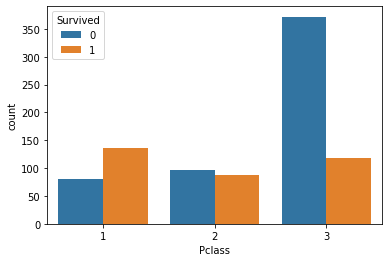

In [26]:
ax = sns.countplot(x='Pclass', hue="Survived", data=train)
plt.show()

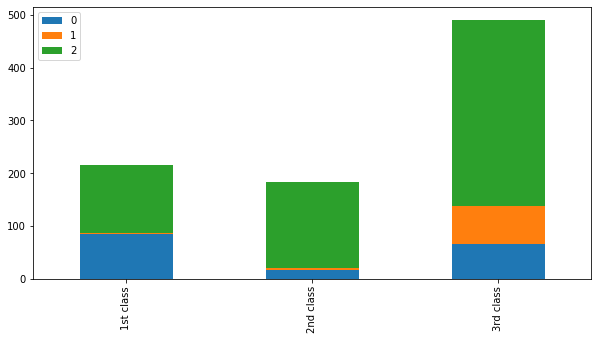

In [28]:
# Pclass counts for Embarked

Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

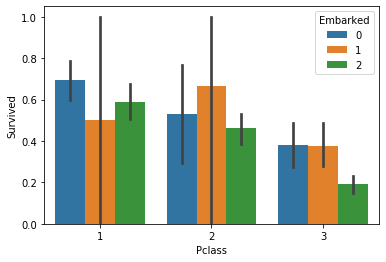

In [30]:
import seaborn as sns
sns.barplot(
    data = train,
    x = "Pclass",
    y = "Survived",
    hue = "Embarked"
)

# Pclass 가 3등급인 사람들은 1, 2 등급 보다 생존률이 현저히 낮음, 타이타닉의 탑승순서는 S → C → Q 
# 그 중에서도 제일 먼저 탑승한 S-사우스햄튼에서 탄 3등급 객실이 사람들의 생존율이 0.18 이었음.


In [23]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion mat

In [24]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score #채점 자동으로 매겨주는 것
# 결정트리, Random forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

X_trains = X_train.copy()


# 3. Modeling

In [61]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_trains, y_train, 
                                                    test_size=0.2, 
                                                    random_state=10)
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(712, 7)
(179, 7)
(712,)
(179,)


In [22]:
# Decision tree

model=DecisionTreeClassifier()
model.fit(X_train2, y_train2)
prediction4=model.predict(X_test2)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, y_test2))

The accuracy of the Decision Tree is 0.7541899441340782


In [22]:
# Random forest

model = RandomForestClassifier()
model.fit(X_train2, y_train2)
prediction6 = model.predict(X_test2)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction6, y_test2))

The accuracy of the Random Forests is 0.8212290502793296


# GridGV

In [1]:
from sklearn.model_selection import GridSearchCV
import time

start = time.time()
params = {
    'n_estimators':
    'max_depth' : , 
    'min_samples_leaf' : 
    'min_samples_split' : 
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1, verbose=2 )
grid_cv.fit(X_train2 , y_train2)

#print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

print('실행시간 : ', time.time()-start)

NameError: name 'RandomForestClassifier' is not defined

In [1]:
rf_clf1 = RandomForestClassifier(n_estimators=250, max_depth=3, min_samples_leaf=6,min_samples_split=2, random_state=0)
rf_clf1.fit(X_train2 , y_train2)
pred = rf_clf1.predict(X_test2)
print('Predict Accuracy: {0:.4f}'.format(accuracy_score(y_test2 , pred)))

NameError: name 'RandomForestClassifier' is not defined

예측 정확도: 0.8547

예측 정확도: 0.8715
                                 
                       

# Randomized Search

In [29]:
############### Start: Randomized Search CV ##################################

# Look at parameters used by our current forest
# from sklearn.ensemble import RandomForestRegressor

rf = RandomForestClassifier()


# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf.get_params())

from sklearn.model_selection import RandomizedSearchCV
# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 1)

#X_train, X_test, y_train, y_test = train_test_split(train_df[nz], train_df.target.values, test_size=0.2)


rf_random.fit(X_train, y_train)

# accuracy score가 아니라 mse 와 rmse 로 확인 0에 가까울 수록 좋다. 
#mse = mean_squared_error(y_test, y_preds)
#rmse = np.sqrt(mse) #루트 씌워서... 따로 제공해 주는게 없어서..

#print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
#print('Variance score = R제곱 -> 1에 가까울 수록 좋다 (0과 1사이)')
#print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=12 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=12, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=12 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=12, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=12 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=12, total=   1.7s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=12 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=12, total=   1.0s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=12 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=12, total=   1.0s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=12 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=12, total=   1.0s
[CV] n_estimators=1000, min_samples_split=2, m

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  5.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [30]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
rf_1 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs= -1, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf_1.fit(X_train2 ,y_train2 )
y_preds = rf_1.predict(X_test2)[:1]
#print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test2 , y_preds)))

예측 정확도: 0.8547


In [65]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 57 to 265
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Sex          712 non-null    int32  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Embarked     712 non-null    int32  
dtypes: float64(1), int32(2), int64(4)
memory usage: 38.9 KB


In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int32  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Embarked     418 non-null    int32  
dtypes: float64(1), int32(2), int64(4), object(1)
memory usage: 23.0+ KB


In [67]:
X_train =  X_train2[['Sex','Pclass', 'SibSp', 'Parch', 'Age']]
X_test = test[['Sex', 'Pclass', 'SibSp', 'Parch', 'Age']] 

In [63]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [70]:
#X_train2 =  X_train2[['Sex','Pclass', 'SibSp', 'Parch', 'Age']]
#X_test = test[['Sex', 'Pclass', 'SibSp', 'Parch', 'Age']] 

rf_1 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs= -1, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf_1.fit(X_train ,y_train2 )
#rf_pred2 = rf_1.predict(X_test)[:,1]
rf2 = rf_1.predict_proba(X_test)[:,1]
#print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test2 , rf_pred2)))

In [71]:
test2 = pd.DataFrame(test['PassengerId'])

In [72]:
test2.tail()

,PassengerId
413,1305
414,1306
415,1307
416,1308
417,1309


In [73]:
test2['Survived'] = 1

In [74]:
test2['Survived'] = rf2

In [76]:
test2.to_csv('./titanic/rf_RandomSearchCV.csv', index=False)
'''
예측 정확도: 0.8715
RandomForestClassifier(n_estimators=250, max_depth=6, min_samples_leaf=7, \
                                 min_samples_split=2, random_state=0)
'''

'\n예측 정확도: 0.8715\nRandomForestClassifier(n_estimators=250, max_depth=6, min_samples_leaf=7,                                  min_samples_split=2, random_state=0)\n'